# Energy Consumption and Production Analysis

## 1. Introduction

This notebook presents a preliminary analysis of energy consumption and photovoltaic (PV) energy production data. The goal is to monitor energy usage and determine when the air conditioning should be turned on or off based on the energy balance.

### Objectives
- Load and preprocess the historical energy data.
- Analyze the relationship between energy consumption and production.
- Implement a simple rule-based system to control the air conditioning.
- Visualize the results and key metrics.

## 2. Data Loading and Preprocessing

### 2.1 Import Libraries


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Load the CSV Data

In [126]:
# Load the data from the CSV file
file_path = './household_data_1min_singleindex.csv'
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataframe
data.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:59:00Z,2014-12-11T18:59:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:01:00Z,2014-12-11T19:01:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:02:00Z,2014-12-11T19:02:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T18:03:00Z,2014-12-11T19:03:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3 Data Overview

In [127]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307133 entries, 0 to 2307132
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   utc_timestamp                        object 
 1   cet_cest_timestamp                   object 
 2   DE_KN_industrial1_grid_import        float64
 3   DE_KN_industrial1_pv_1               float64
 4   DE_KN_industrial1_pv_2               float64
 5   DE_KN_industrial2_grid_import        float64
 6   DE_KN_industrial2_pv                 float64
 7   DE_KN_industrial2_storage_charge     float64
 8   DE_KN_industrial2_storage_decharge   float64
 9   DE_KN_industrial3_area_offices       float64
 10  DE_KN_industrial3_area_room_1        float64
 11  DE_KN_industrial3_area_room_2        float64
 12  DE_KN_industrial3_area_room_3        float64
 13  DE_KN_industrial3_area_room_4        float64
 14  DE_KN_industrial3_compressor         float64
 15  DE_KN_industrial3_cooling_aggreg

In [128]:
# Basic statistics
data.describe()

,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,...,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
count,985923.000000,1.037254e+06,1.037254e+06,676679.000000,719958.000000,585125.000000,585125.000000,861544.000000,861544.000000,861544.000000,...,1.848161e+06,873794.000000,1.412407e+06,1.291986e+06,843637.000000,920733.000000,1.001323e+06,1.291986e+06,1.291985e+06,887023.000000
mean,221549.284602,4.520284e+03,3.545160e+03,7995.946822,10728.635573,826.576464,503.711765,8489.725058,3148.572994,14651.890118,...,4.689965e+03,294.506706,2.444609e+02,4.574917e+02,45.881082,100.860337,2.178960e+03,4.208182e+03,1.004240e+04,38.226608
std,149020.563958,3.287108e+03,2.536205e+03,5128.889287,7625.372841,424.429656,254.382644,4601.518458,1769.099377,8195.610366,...,2.612385e+03,176.489596,1.298315e+02,2.600617e+02,28.796725,34.126209,1.003656e+03,1.841632e+03,6.586988e+03,21.898277
min,0.250000,3.000000e-03,3.000000e-03,0.026000,0.010000,0.000000,0.000000,1.838000,0.560000,1.503000,...,3.000000e-03,0.000000,0.000000e+00,3.100000e-02,0.000000,0.001000,5.000000e-03,9.100000e-01,0.000000e+00,0.000000
25%,77546.748500,1.141557e+03,8.538737e+02,3677.433000,2502.446000,487.898000,304.219000,4673.877000,1556.114750,7684.630250,...,2.254444e+03,134.433000,1.414090e+02,2.527622e+02,18.464000,93.957000,1.524210e+03,3.252501e+03,3.919890e+03,22.275000
50%,224827.461000,5.000102e+03,3.988004e+03,6583.439000,10549.136000,920.856000,569.398000,8645.936500,3274.951500,14851.437500,...,4.758671e+03,300.318000,2.470380e+02,4.472965e+02,46.184000,104.914000,1.760510e+03,4.555852e+03,9.563700e+03,35.457000
75%,334313.359500,6.694052e+03,5.183133e+03,13206.453000,19012.787000,1116.440000,670.425000,12423.141000,4723.389000,21536.715000,...,7.195781e+03,447.712000,3.483300e+02,6.691008e+02,70.654000,127.344000,3.347620e+03,5.406044e+03,1.666983e+04,54.895000
max,511112.711000,1.100134e+04,8.377523e+03,16699.016000,22122.400000,1576.598000,954.553000,16046.565000,5981.095000,28679.348000,...,8.773800e+03,603.771000,4.764620e+02,9.507440e+02,96.078000,146.692000,3.443260e+03,7.349309e+03,2.049540e+04,78.641000


### 2.4 Data Preprocessing

In [129]:
first_valid_index = data['DE_KN_residential2_grid_import'].first_valid_index()
last_valid_index = data['DE_KN_residential2_grid_import'].last_valid_index()

data = data.loc[first_valid_index:last_valid_index]

In [132]:
# Convert timestamp columns to datetime
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], utc=True)
data['cet_cest_timestamp'] = pd.to_datetime(data['cet_cest_timestamp'], utc=True)

data = data[[
    'utc_timestamp', 
    'DE_KN_residential2_circulation_pump', 
    'DE_KN_residential2_dishwasher', 
    'DE_KN_residential2_freezer', 
    'DE_KN_residential2_grid_import',
    'DE_KN_residential2_washing_machine',
    'DE_KN_residential1_pv'
]]
# Drop rows with missing values
data.dropna(inplace=True)

/var/folders/gd/q32w8wgd1bxc7wq53vd9nts80000gn/T/ipykernel_87192/4047950688.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


## 3. Analyzing Energy Consumption and Production

### 3.1 Calculate Total Consumption and Production

In [141]:
data['residential2_circulation_pump'] = data['DE_KN_residential2_circulation_pump'].diff().fillna(0)
data['residential2_dishwasher'] = data['DE_KN_residential2_dishwasher'].diff().fillna(0)
data['residential2_freezer'] = data['DE_KN_residential2_freezer'].diff().fillna(0)
data['residential2_washing_machine'] = data['DE_KN_residential2_washing_machine'].diff().fillna(0)

data['total_production'] = data['DE_KN_residential1_pv'].diff().fillna(0)
data['total_consumption'] = data['DE_KN_residential2_grid_import'].diff().fillna(0)

### 3.2 Determine Air Conditioning State

In [142]:
# Initialize the air conditioning column with 0
data['air_conditioning_on'] = 0

# Set air conditioning on if production > consumption
data.loc[data['total_production'] > data['total_consumption'], 'air_conditioning_on'] = 1

# Shift the air conditioning state by one period to use the previous period's decision
data['air_conditioning_on'] = data['air_conditioning_on'].shift(1, fill_value=0)


## 4. Visualization and Metrics

### 4.1 Plotting Energy Consumption and Production

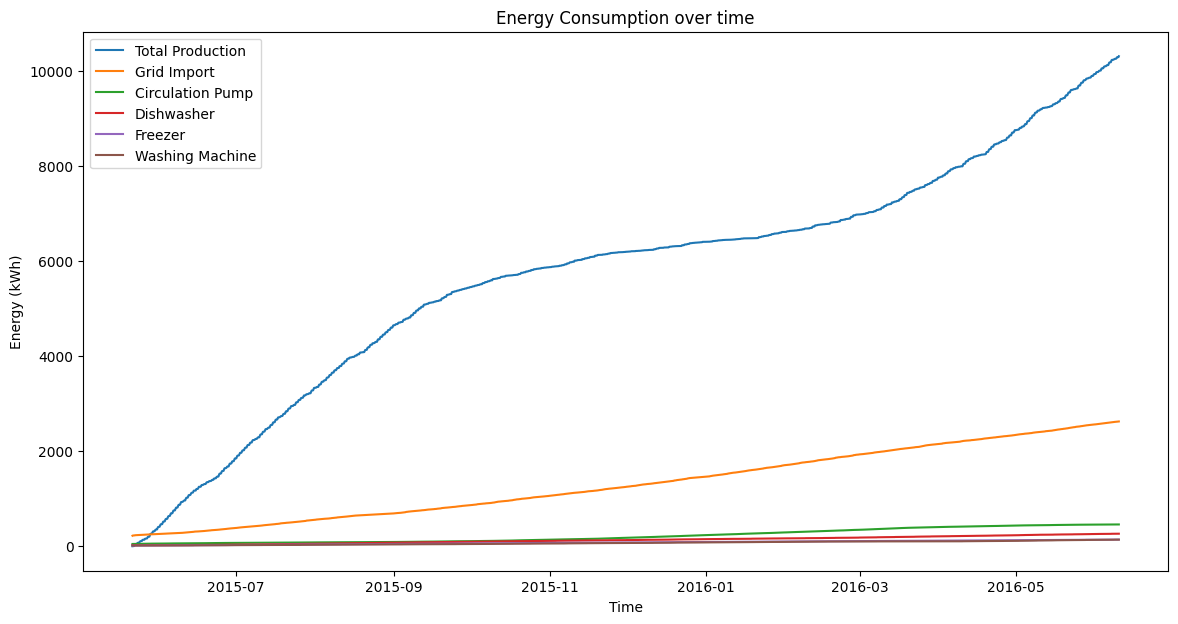

In [140]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='utc_timestamp', y='DE_KN_residential1_pv', data=data, label='Total Production')
sns.lineplot(x='utc_timestamp', y='DE_KN_residential2_grid_import', data=data, label='Grid Import')
sns.lineplot(x='utc_timestamp', y='DE_KN_residential2_circulation_pump', data=data, label='Circulation Pump')
sns.lineplot(x='utc_timestamp', y='DE_KN_residential2_dishwasher', data=data, label='Dishwasher')
sns.lineplot(x='utc_timestamp', y='DE_KN_residential2_freezer', data=data, label='Freezer')
sns.lineplot(x='utc_timestamp', y='DE_KN_residential2_washing_machine', data=data, label='Washing Machine')

plt.title('Energy Consumption over time')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()

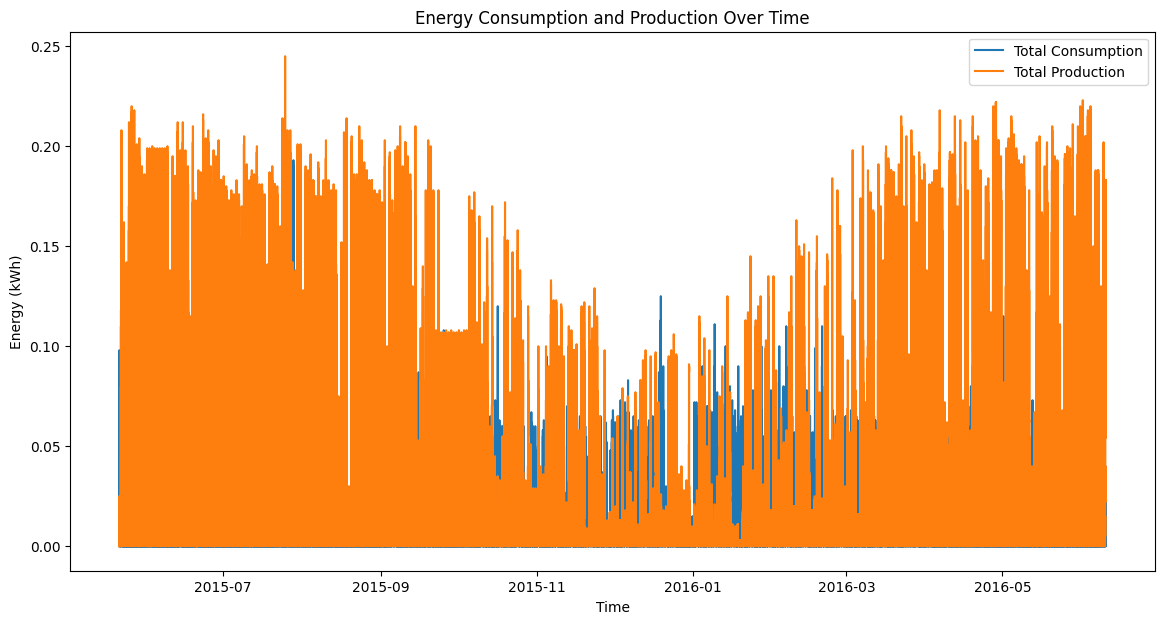

In [143]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='utc_timestamp', y='total_consumption', data=data, label='Total Consumption')
sns.lineplot(x='utc_timestamp', y='total_production', data=data, label='Total Production')
plt.title('Energy Consumption and Production Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()

### 4.2 Air Conditioning State Over Time

/var/folders/gd/q32w8wgd1bxc7wq53vd9nts80000gn/T/ipykernel_87192/3442675225.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data.resample('H', on='utc_timestamp').mean()


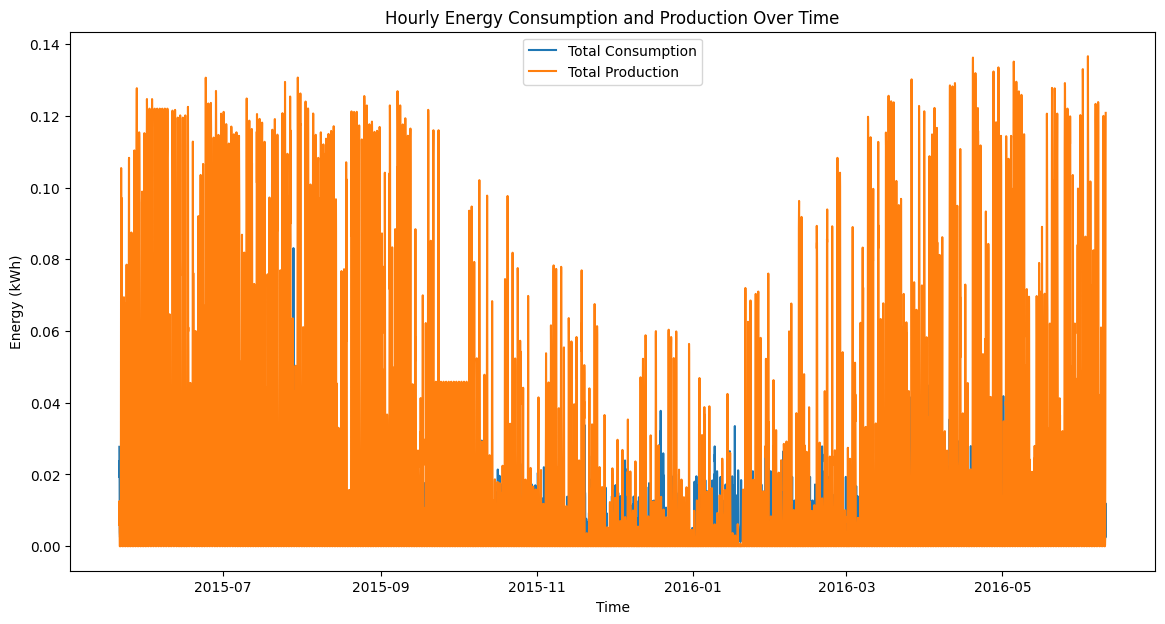

In [144]:
data_hourly = data.resample('H', on='utc_timestamp').mean()

# Plot resampled data
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_hourly, x='utc_timestamp', y='total_consumption', label='Total Consumption')
sns.lineplot(data=data_hourly, x='utc_timestamp', y='total_production', label='Total Production')
plt.title('Hourly Energy Consumption and Production Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()

### 4.3 Air conditioning State Hourly

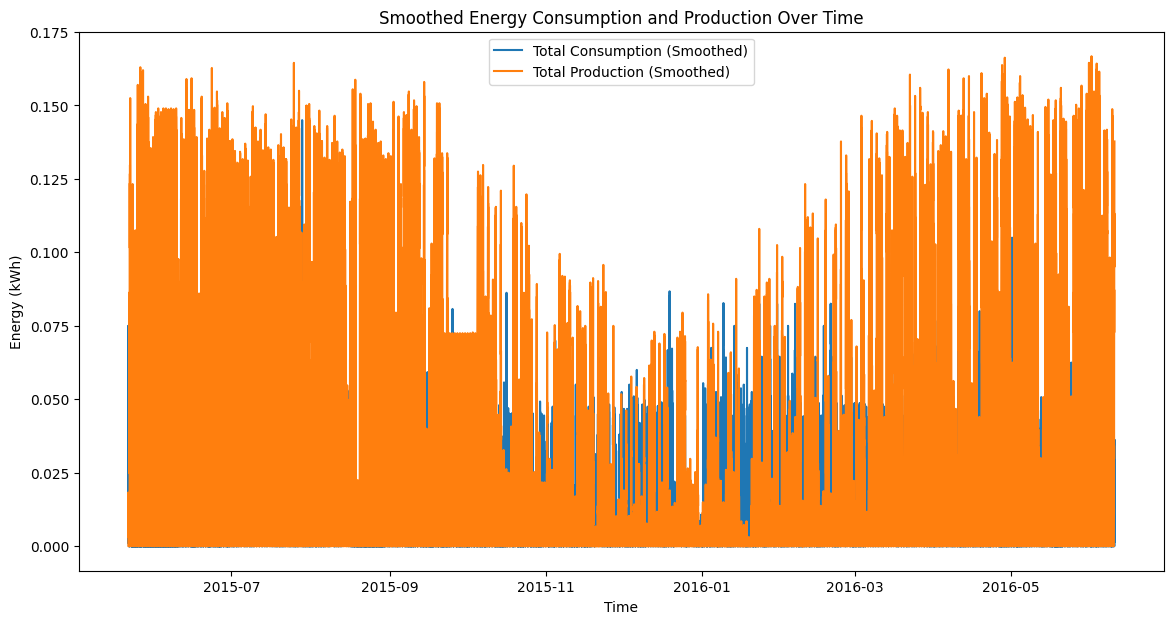

In [145]:
# Apply rolling mean with a window of 60 minutes
data['total_consumption_smooth'] = data['total_consumption'].rolling(window=4).mean()
data['total_production_smooth'] = data['total_production'].rolling(window=4).mean()

# Plot smoothed data
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='utc_timestamp', y='total_consumption_smooth', label='Total Consumption (Smoothed)')
sns.lineplot(data=data, x='utc_timestamp', y='total_production_smooth', label='Total Production (Smoothed)')
plt.title('Smoothed Energy Consumption and Production Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()

### 4.4 - Air Conditioning State - Zoom in 

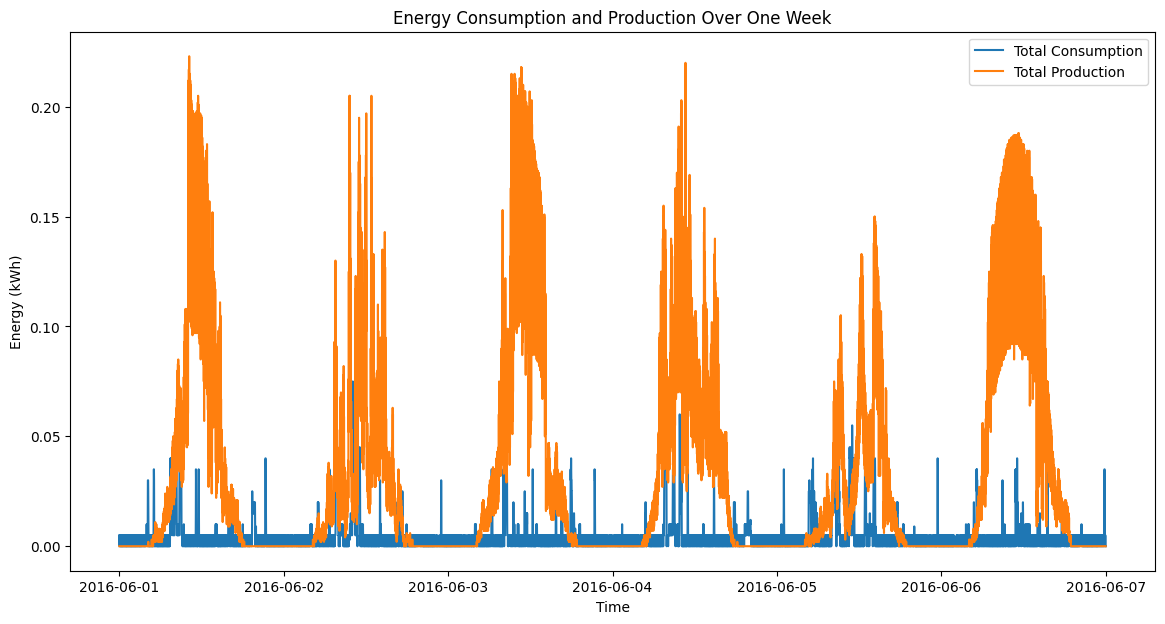

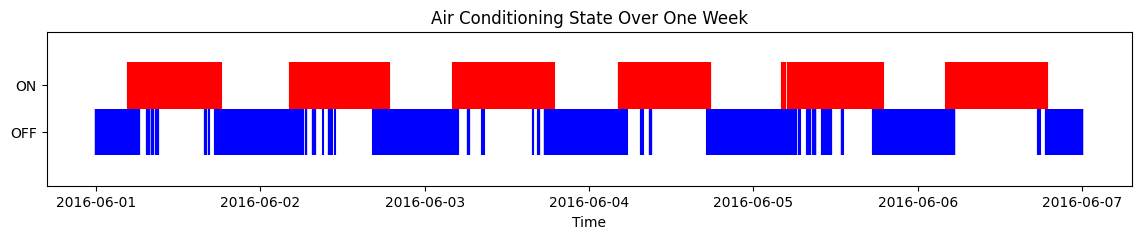

In [146]:
# Select a specific week to visualize
start_date = '2016-06-01'
end_date = '2016-06-07'
data_week = data[(data['utc_timestamp'] >= start_date) & (data['utc_timestamp'] <= end_date)]

# Plot data for the specific week
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_week, x='utc_timestamp', y='total_consumption', label='Total Consumption')
sns.lineplot(data=data_week, x='utc_timestamp', y='total_production', label='Total Production')
plt.title('Energy Consumption and Production Over One Week')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()

# Plot air conditioning state for the specific week with event plot
plt.figure(figsize=(14, 2))
plt.eventplot(data_week[data_week['air_conditioning_on'] == 1]['utc_timestamp'], lineoffsets=1, colors='red')
plt.eventplot(data_week[data_week['air_conditioning_on'] == 0]['utc_timestamp'], lineoffsets=0, colors='blue')
plt.title('Air Conditioning State Over One Week')
plt.xlabel('Time')
plt.yticks([0, 1], ['OFF', 'ON'])
plt.show()

### 4.3 Distribution of Consumption and Production

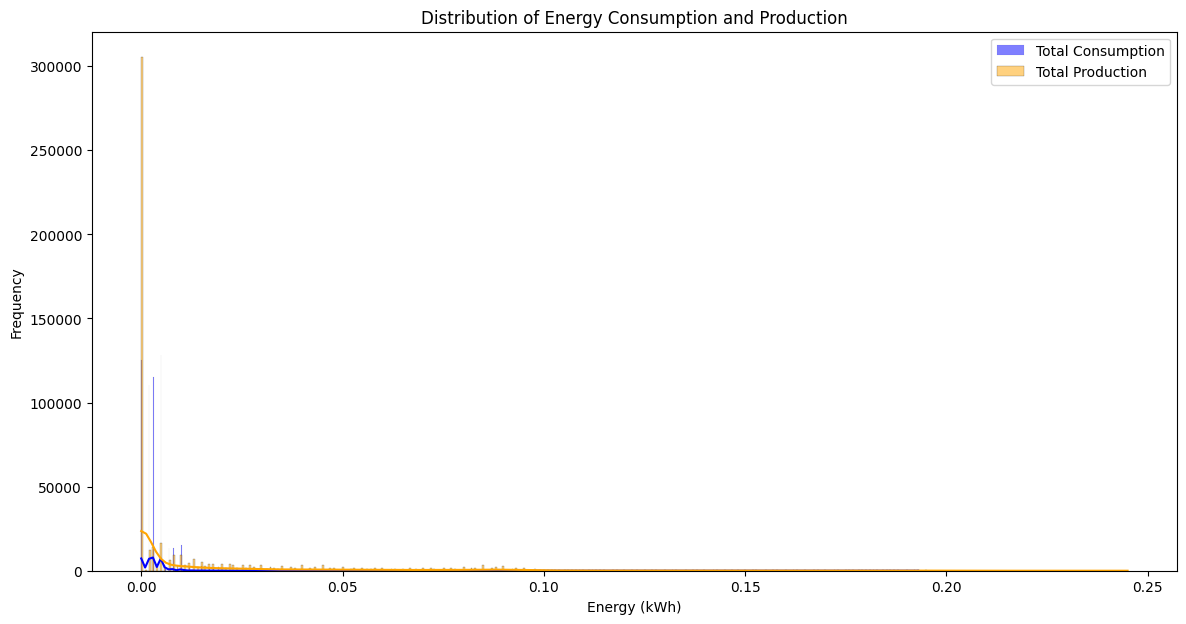

In [147]:
plt.figure(figsize=(14, 7))
sns.histplot(data['total_consumption'], kde=True, color='blue', label='Total Consumption')
sns.histplot(data['total_production'], kde=True, color='orange', label='Total Production')
plt.title('Distribution of Energy Consumption and Production')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 4.4 Metrics

In [148]:
# First, create a column indicating when air_conditioning_on changes state
data['change'] = (data['air_conditioning_on'] != data['air_conditioning_on'].shift(1)).astype(int)

# Assign a group number to each block of consecutive values
data['group'] = data['change'].cumsum()

# Filter periods where air conditioning is on (air_conditioning_on == 1)
on_periods = data[data['air_conditioning_on'] == 1]
off_periods = data[data['air_conditioning_on'] == 0]

# Calculate the duration of each continuous period where air conditioning is on
on_periods['duration'] = on_periods.groupby('group')['utc_timestamp'].transform(lambda x: (x.max() - x.min()).total_seconds() / 3600)
off_periods['duration'] = off_periods.groupby('group')['utc_timestamp'].transform(lambda x: (x.max() - x.min()).total_seconds() / 3600)

# Calculate the average time the air conditioning is continuously on
average_on_time = on_periods['duration'].mean()
average_off_time = off_periods['duration'].mean()

/var/folders/gd/q32w8wgd1bxc7wq53vd9nts80000gn/T/ipykernel_87192/3607908551.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_periods['duration'] = on_periods.groupby('group')['utc_timestamp'].transform(lambda x: (x.max() - x.min()).total_seconds() / 3600)
/var/folders/gd/q32w8wgd1bxc7wq53vd9nts80000gn/T/ipykernel_87192/3607908551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_periods['duration'] = off_periods.groupby('group')['utc_timestamp'].transform(lambda x: (x.max() - x.min()).total_se

In [149]:
# Calculate the percentage of time the air conditioning was on
ac_on_percentage = data['air_conditioning_on'].mean() * 100

# Calculate the mean and standard deviation of consumption and production
mean_consumption = data['total_consumption'].mean()
std_consumption = data['total_consumption'].std()
mean_production = data['total_production'].mean()
std_production = data['total_production'].std()

# Calculate Peak Demand and Production
peak_demand = data['total_consumption'].max()
peak_production = data['total_production'].max()

print(f"Air Conditioning On Percentage: {ac_on_percentage:.2f}%")
print(f"Mean Consumption: {mean_consumption:.2f} kWh (Std: {std_consumption:.2f} kWh)")
print(f"Mean Production: {mean_production:.2f} kWh (Std: {std_production:.2f} kWh)")
print(f"Peak Demand: {peak_demand:.2f} kWh")
print(f"Peak Production: {peak_production:.2f} kWh")
print(f"Average time the air conditioning is continuously on: {average_on_time:.2f} hours")
print(f"Average time the air conditioning is continuously off: {average_off_time:.2f} hours")

Air Conditioning On Percentage: 39.14%
Mean Consumption: 0.00 kWh (Std: 0.01 kWh)
Mean Production: 0.02 kWh (Std: 0.04 kWh)
Peak Demand: 0.19 kWh
Peak Production: 0.25 kWh
Average time the air conditioning is continuously on: 6.00 hours
Average time the air conditioning is continuously off: 12.01 hours


## 5. Next Steps
- Integrate real-time data monitoring.
- Develop and test machine learning models to predict energy consumption and production.
- Implement autonomous agents to optimize energy usage and interact with PEAQ blockchain.